In [87]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from Pytorch_dataset import DimReduction_dataset
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('cuda is available')

def model_evaluate(eol_model, batch_size=32, model_num=0):
    # load train data
    eol_train_dataset = DimReduction_dataset(train=True, pred_target='EOL', norm=False)
    eol_train_loader = DataLoader(eol_train_dataset, batch_size=batch_size, shuffle=False)

    # load test data
    eol_test_dataset = DimReduction_dataset(train=False, pred_target='EOL', norm=False)
    eol_test_loader = DataLoader(eol_test_dataset, batch_size=batch_size, shuffle=False)

    eol_model = eol_model.to(device)
    num_trainbatch = len(eol_train_dataset)
    num_testbatch = len(eol_test_loader)
    with torch.no_grad():
        rmse_train_sum = 0
        mape_train_sum = 0
        for inputs, targets in eol_train_loader:
            inputs = inputs.to(device)
            targets = targets
            outputs = eol_model(inputs)
            rmse_train = mean_squared_error(targets, outputs.cpu(), squared=False)
            mape_train = mean_absolute_percentage_error(targets, outputs.cpu())
            rmse_train_sum += rmse_train
            mape_train_sum += mape_train
            plt.plot(outputs.cpu(), targets, 'ro', markersize=2.5)
        print(f'Training set|RMSE: {rmse_train_sum/num_trainbatch:.2f}, MAPE: {mape_train_sum/num_trainbatch:.2f}')

        rmse_test_sum = 0
        mape_test_sum = 0
        for inputs, targets in eol_test_loader:
            inputs = inputs.to(device)
            targets = targets
            outputs = eol_model(inputs)
            rmse_test = mean_squared_error(targets, outputs.cpu(), squared=False)
            mape_test = mean_absolute_percentage_error(targets, outputs.cpu())
            rmse_test_sum += rmse_test
            mape_test_sum += mape_test
            # plot
            plt.plot(outputs.cpu(), targets, 'bo', markersize=2.5)
        print(f'Testing set|RMSE: {rmse_test_sum/num_testbatch:.2f}, MAPE: {mape_test_sum/num_testbatch:.2f}')
        plt.title('EOL')
        plt.plot([0,2000], [0,2000], 'k--', linewidth=1.0)
        plt.xlabel('predicted')
        plt.ylabel('ground truth')
        plt.savefig('Figures/eol_model'+str(model_num)+'.jpg')



cuda is available


Training set|RMSE: 4.84, MAPE: 0.01
Testing set|RMSE: 207.50, MAPE: 0.26


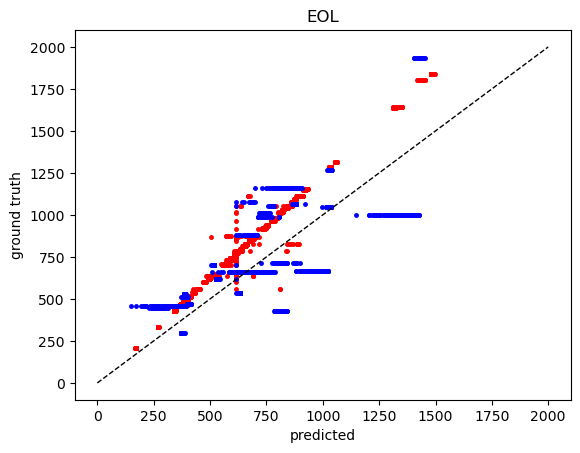

In [88]:
batch_size = 32

# load model
"""
num_epochs = 500
batch_size = 32
lr = 1e-3
weight_decay = 1e-3
cosine_period = 20
min_lr = 1e-6
delta_huber = 1
"""
FILE = 'Model/eol_model1.pth'
eol_model1 = torch.load(FILE)
eol_model1.eval()
model_evaluate(eol_model1, batch_size=batch_size, model_num=1)

Training set|RMSE: 5.00, MAPE: 0.01
Testing set|RMSE: 217.26, MAPE: 0.26


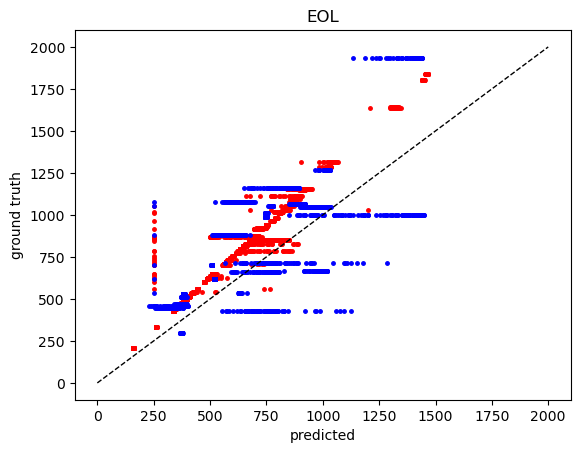

In [89]:
"""
num_epochs = 250
batch_size = 32
lr = 1e-3
weight_decay = 1e-3
cosine_period = 20
min_lr = 1e-6
delta_huber = 1
"""
FILE = 'Model/eol_model2.pth'
eol_model2 = torch.load(FILE)
eol_model2.eval()
model_evaluate(eol_model2, batch_size=batch_size, model_num=2)

Training set|RMSE: 4.25, MAPE: 0.01
Testing set|RMSE: 187.50, MAPE: 0.24


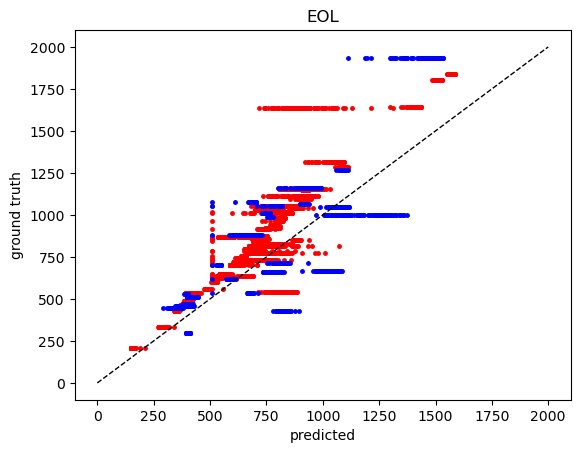

In [90]:
"""
num_epochs = 50
batch_size = 32
lr = 1e-3
weight_decay = 1e-3
cosine_period = 20
min_lr = 1e-6
delta_huber = 1
"""
FILE = 'Model/eol_model3.pth'
eol_model3 = torch.load(FILE)
eol_model3.eval()
model_evaluate(eol_model3, batch_size=batch_size, model_num=3)

Training set|RMSE: 3.90, MAPE: 0.01
Testing set|RMSE: 197.87, MAPE: 0.25


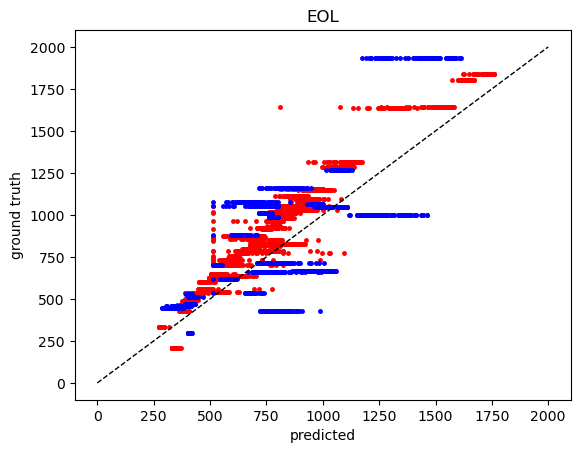

In [91]:
"""
num_epochs = 25
batch_size = 32
lr = 1e-3
weight_decay = 1e-3
cosine_period = 20
min_lr = 1e-6
delta_huber = 1
"""
FILE = 'Model/eol_model4.pth'
eol_model4 = torch.load(FILE)
eol_model4.eval()
model_evaluate(eol_model4, batch_size=batch_size, model_num=4)

Training set|RMSE: 5.01, MAPE: 0.01
Testing set|RMSE: 222.72, MAPE: 0.27


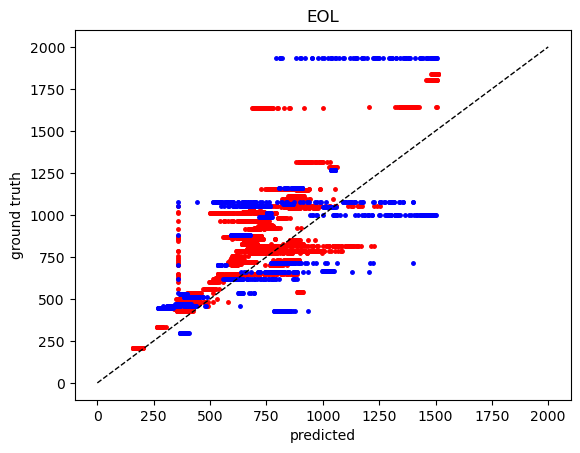

In [92]:
"""
num_epochs = 50
batch_size = 32
lr = 1e-2
weight_decay = 1e-3
cosine_period = 5
min_lr = 1e-5
delta_huber = 1
"""
FILE = 'Model/eol_model5.pth'
eol_model5 = torch.load(FILE)
eol_model5.eval()
model_evaluate(eol_model5, batch_size=batch_size, model_num=5)